<a href="https://colab.research.google.com/github/GuilhermeDumam/Desafio_Candy_Power/blob/Master/Desafio_Candy_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Desafio

O doce é de chocolate? 

[Candy Power Chanllege](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking)

Vamos descobrir a partir do desempenho dos doces em hallowens. Utilizaremos a 'regressão logística' para classificar se o doce é ou não é de chocolate.

As etapas abaixo são:


*   Importação das bibliotecas e da base de dados
*   EDA e Feature Engineering
*   Modelagem
*   Conclusão



In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


###EDA - vamos importar e explorar nossa base de dados, veremos o balanceamento, sua distribuição, missing values, valores duplicados.

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']] 	

print(df.shape)
df.head()

(85, 12)


,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [ ]:
df.isna().sum()

fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
chocolate           0
dtype: int64

In [ ]:
df[df.duplicated()].count().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fruity            85 non-null     int64  
 1   caramel           85 non-null     int64  
 2   peanutyalmondy    85 non-null     int64  
 3   nougat            85 non-null     int64  
 4   crispedricewafer  85 non-null     int64  
 5   hard              85 non-null     int64  
 6   bar               85 non-null     int64  
 7   pluribus          85 non-null     int64  
 8   sugarpercent      85 non-null     float64
 9   pricepercent      85 non-null     float64
 10  winpercent        85 non-null     float64
 11  chocolate         85 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 8.1 KB


### Balanceamento

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


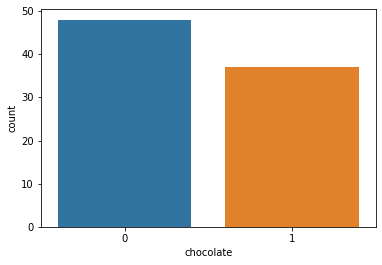

In [ ]:
sns.countplot("chocolate", data=df)
plt.show()

O dataset está com um balanceamento "bom", não precisamos adotar técnicas de 'oversampling' e/ou 'undersampling'.

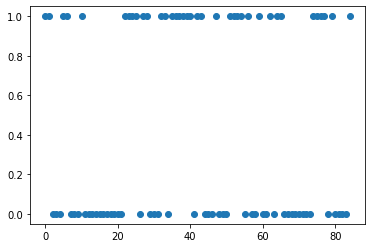

In [ ]:
plt.scatter(df.index, df.chocolate)
plt.show()

In [ ]:
df.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.770833,0.083333,0.041667,0.020833,0.000000,0.291667,0.020833,0.666667,0.452937,0.343021,42.142257
1,0.027027,0.270270,0.324324,0.162162,0.189189,0.027027,0.540541,0.324324,0.512000,0.632162,60.921529


Aqui nós temos as informações de como se comporta os parâmetros para cada tipo de doce. 0 = não de chocolate, 1 = de chocolate. 

## Train Test Split - Vamos dividir nosso dataset em features para treino e teste. Lembrando que nosso 'target', nosso objetivo, é saber se o doce é chocolate ou não. 


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	

y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	

y_test = test_df["chocolate"]

In [ ]:
y_test.head()

78    0
0     1
68    0
22    1
12    0
Name: chocolate, dtype: int64

### Dúvida: Não precisaríamos trabalhar nas features? (escalar, transformar categóricas em contínuas).


*   Nós vimos que as features categóricas já estão em formatação binária, e as com valores numéricos estão em escalas muito próximas. Dispensando a necessidade de técnicas de escala e transformação.  

### Treinamento do Modelo

In [ ]:
LogisticRegression?

Text(0.5, 1.0, 'logistic function')

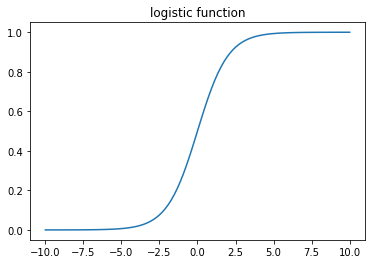

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function - demonstração.
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

In [ ]:
## Aplicação Chocolate
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='sag', random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
#Os parâmetros do algoritmo deixaremos como padrão
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Achamos o Alfa da equação logística
logreg.intercept_ 

array([-0.29822741])

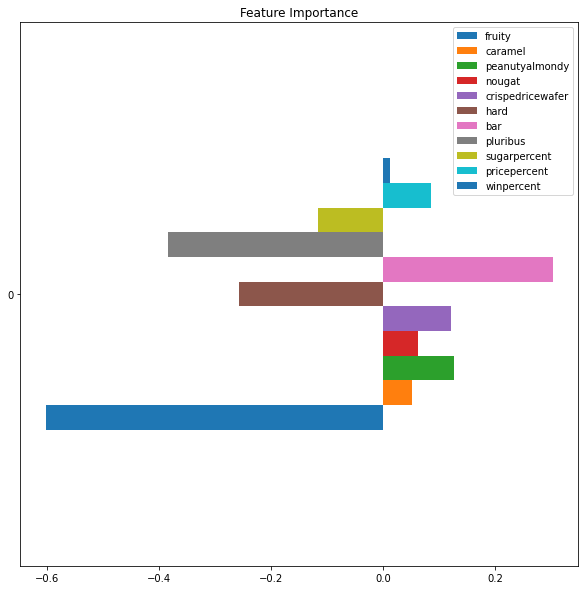

In [ ]:
pd.DataFrame(data=logreg.coef_, columns=X_train.columns).plot.barh(figsize=(10,10))
plt.title("Feature Importance")
plt.show()

####Com esse gráfico acima, podemos ver que as features que mais influenciam para o doce ser ou não ser de chocolate, são: 

*   Se ele tem fruta, influenciando negativamente para ele ser chocolate.
*   Se ele é em formato de barra, influenciando positivamente para ele ser chocolate.
*   Se ele é duro, influenciando negativamente para ser chocolate.
*   Se ele é um doce em uma caixa ou solo, influencia negativamente. 




### Avaliação Matriz de Confusão

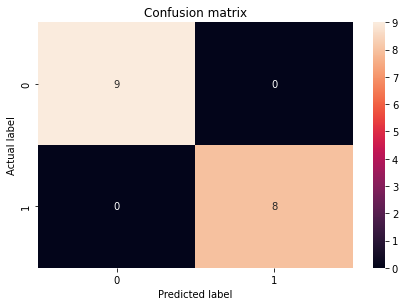

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

###Métricas para interpretação da eficiência do modelo.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


####Nosso modelo teve uma predição praticamente perfeita.

isso é bom? Sim e não.
Podemos estar 'overfittando' nosso modelo, o que quer dizer que se mudarmos o cenário de treino, para outros dados no teste, ele pode se perder e predizer erroneamente.

Mas, pode ser que devido ao pequeno tamanho do dataset, seu balanceamento, suas features já serem bem separadas entre ser ou não ser chocolate; gerou um cenário muito favorável pra predição do modelo. 

### ROC (Receiver Operation Characteristic) Curve

É uma medida de desempenho para problemas de classificação em várias configurações de limites. ROC é uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Diz o quanto o modelo é capaz de distinguir entre as classes. Quanto maior a AUC, melhor será o modelo em prever 0s como 0s e 1s como 1s. Por analogia, quanto maior a AUC, melhor o modelo distingue entre pacientes com doença e sem doença.

* A curva ROC é traçada com TPR contra FPR, onde TPR está no eixo y e FPR está no eixo x.

* AUC (Area Under Curve) varia de 0,0 até 1,0, ou de 0% a 100%. Quanto maior o AUC, melhor, e nos permite comparar diferentes modelos.


In [ ]:
y_test.shape

(17,)

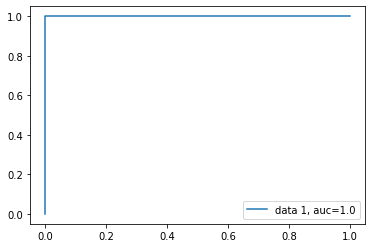

In [ ]:
## predict_prob retorna a probabilidade de cada classe.
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


Encontrando o melhor threshold, um dos métodos mais simples e que resolvem o problema é o [Youden's index](https://en.wikipedia.org/wiki/Youden%27s_J_statistic)


J = TruePositiveRate – FalsePositiveRate

In [ ]:
J = tpr - fpr
ix = np.argmax(J)

In [ ]:
#pontos de corte na curva
thresholds

array([1.74012043, 0.74012043, 0.50949213, 0.28121663])

In [ ]:
#O melhor ponto de corte na curva para predição
print('Best Threshold=%f, J-Index =%.3f' % (thresholds[ix], J[ix]))

Best Threshold=0.509492, J-Index =1.000


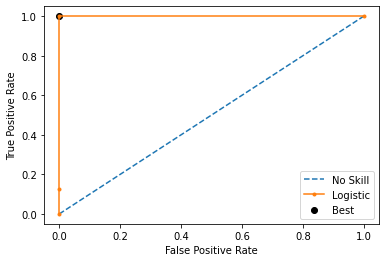

In [ ]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

#####Como o modelo está praticamente perfeito, o melhor ponto será no topo da curva.